Importacion de librerias

In [26]:
import os
import pandas as pd

Definicion de funciones

In [27]:
def validar_csv(ruta_archivo, separador):
    # 1. Validar la extensión del archivo
    if not ruta_archivo.endswith('.csv'):
        print("Error: El archivo no tiene la extensión .csv.")
        return False

    # 2. Intentar abrir el archivo y leer la primera y segunda fila
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
            primera_fila = archivo.readline().strip()
            segunda_fila = archivo.readline().strip()

        # Separar las filas utilizando el separador proporcionado
        columnas_header = primera_fila.split(separador)
        columnas_datos = segunda_fila.split(separador)

        # Validar que las columnas del header no sean nulas o vacías
        if any(col is None or col == '' for col in columnas_header):
            print(f"Error: {ruta_archivo} Hay columnas vacías o nulas en el encabezado.")
            return False

        # 3. Validar que la cantidad de columnas coincida entre el header y los datos
        if len(columnas_header) != len(columnas_datos):
            print(f"Error: {ruta_archivo} El número de columnas en el encabezado es (#{len(columnas_header)}) no coincide con la columna de los datos (#{len(columnas_datos)}).")
            return False

    except Exception as e:
        print(f"Error al procesar el archivo: {e}")
        return False
    return True

In [28]:
# Define la carpeta donde se encuentran los archivos .csv
carpeta = 'datasets'  # Cambia esto a la ruta correcta según tu entorno
separador = ','

# Cargar los datos
try:
    # Verificar si la carpeta existe
    if not os.path.exists(carpeta):
        if not os.path.exists('/'+carpeta):
            raise FileNotFoundError(f"La carpeta '{carpeta}' no se encuentra.")
       
    
    # Iterar sobre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.endswith('.csv'):
            # validar archivo
            if validar_csv(os.path.join(carpeta, archivo), separador):
                # Crear el nombre de la variable
                nombre_variable = 'df_' + archivo[:-4]  # Eliminar la extensión '.csv'
                # Cargar el archivo
                globals()[nombre_variable] = pd.read_csv(os.path.join(carpeta, archivo))
                print(f"Archivo '{archivo}' cargado exitosamente como '{nombre_variable}'")

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Ocurrió un error: {e}")

Archivo 'ce2019_bc.csv' cargado exitosamente como 'df_ce2019_bc'
Archivo 'diccionario_de_datos_ce2019.csv' cargado exitosamente como 'df_diccionario_de_datos_ce2019'
Archivo 'tc_codigo_actividad.csv' cargado exitosamente como 'df_tc_codigo_actividad'
Archivo 'tc_entidad_municipio.csv' cargado exitosamente como 'df_tc_entidad_municipio'
Archivo 'tc_estrato_ce2019.csv' cargado exitosamente como 'df_tc_estrato_ce2019'


C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\2806909044.py:21: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[nombre_variable] = pd.read_csv(os.path.join(carpeta, archivo))


In [29]:
def mostrar_info_dataset(data,nombre_variable):
    print('---' * 60)
    # Mostrar el nombre de la variable
    print(f" 1. Nombre de la variable: {nombre_variable}")
    # Mostrar las primeras filas del dataset
    print("Primeras filas del dataset:")
    display(data.head(5))
    print()
    # Obtener información sobre el dataset
    print(" 2. Información del dataset:")
    data.info()
    print()
    # Describir el dataset para obtener estadísticas básicas
    print(" 3. Descripción del dataset:")
    display(data.describe(include='all'))
    print()
    # Verificar las columnas presentes en el DataFrame
    print(" 4. Columnas en el DataFrame:")
    print(list(data.columns))
    print()

In [30]:
# Función para limpiar los datos
def limpiar_data(df):
    # Convertir los nombres de las columnas a minúsculas
    df.columns = df.columns.str.lower()
    return df

# Exporar cada data sed

### Explorar df_diccionario_de_datos_ce2019

In [31]:
mostrar_info_dataset(df_diccionario_de_datos_ce2019,'df_diccionario_de_datos_ce2019')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_diccionario_de_datos_ce2019
Primeras filas del dataset:


,COLUMNA,DESCRIPCION,TIPO_DATO,LONGITUD,CODIGO_VALIDO
0,ENTIDAD,Clave de la entidad federativa,Varchar,2,Vacío._ 01 a 32
1,MUNICIPIO,Clave del municipio,Varchar,3,Vacío._ 001 a 570
2,CODIGO,Código que identifica las diversas actividades...,Varchar,10,Vacío._ 11 a 81323
3,ID_ESTRATO,Clave del estrato,Varchar,2,Vacío._ 1 a 4 y 99
4,UE,Clave de la unidad economica,Varchar,8,1 a 99999999



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   COLUMNA        186 non-null    object
 1   DESCRIPCION    186 non-null    object
 2   TIPO_DATO      186 non-null    object
 3   LONGITUD       186 non-null    object
 4   CODIGO_VALIDO  186 non-null    object
dtypes: object(5)
memory usage: 7.4+ KB

 3. Descripción del dataset:


,COLUMNA,DESCRIPCION,TIPO_DATO,LONGITUD,CODIGO_VALIDO
count,186,186,186,186,186
unique,186,186,2,5,6
top,ENTIDAD,Clave de la entidad federativa,Decimal,15._3,0-999999999999999.999
freq,1,1,181,181,181



 4. Columnas en el DataFrame:
['COLUMNA', 'DESCRIPCION', 'TIPO_DATO', 'LONGITUD', 'CODIGO_VALIDO']



In [32]:
df_diccionario_de_datos_ce2019 = limpiar_data(df_diccionario_de_datos_ce2019)
df_diccionario_de_datos_ce2019 = df_diccionario_de_datos_ce2019[['columna', 'descripcion']]
mostrar_info_dataset(df_diccionario_de_datos_ce2019,'df_diccionario_de_datos_ce2019')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_diccionario_de_datos_ce2019
Primeras filas del dataset:


,columna,descripcion
0,ENTIDAD,Clave de la entidad federativa
1,MUNICIPIO,Clave del municipio
2,CODIGO,Código que identifica las diversas actividades...
3,ID_ESTRATO,Clave del estrato
4,UE,Clave de la unidad economica



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   columna      186 non-null    object
 1   descripcion  186 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB

 3. Descripción del dataset:


,columna,descripcion
count,186,186
unique,186,186
top,ENTIDAD,Clave de la entidad federativa
freq,1,1



 4. Columnas en el DataFrame:
['columna', 'descripcion']



### Explorar df_tc_codigo_actividad

In [33]:
print(df_tc_codigo_actividad['CODIGO'].unique())
mostrar_info_dataset(df_tc_codigo_actividad,'df_tc_codigo_actividad')


[nan '11' '112' ... '8132' '81323' '813230']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_codigo_actividad
Primeras filas del dataset:


,CODIGO,DESC_CODIGO,CLASIFICADOR_CODIGO
0,NaN,Sector Privado y Paraestatal,Gran Sector
1,11,Agricultura._ cría y explotación de animales._...,Sector
2,112,Cría y explotación de animales,Subsector
3,1125,Acuicultura,Rama
4,11251,Acuicultura,Subrama



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CODIGO               1846 non-null   object
 1   DESC_CODIGO          1847 non-null   object
 2   CLASIFICADOR_CODIGO  1847 non-null   object
dtypes: object(3)
memory usage: 43.4+ KB

 3. Descripción del dataset:


,CODIGO,DESC_CODIGO,CLASIFICADOR_CODIGO
count,1846,1847,1847
unique,1846,1595,6
top,11,Comercio al por menor exclusivamente a través ...,Clase
freq,1,4,902



 4. Columnas en el DataFrame:
['CODIGO', 'DESC_CODIGO', 'CLASIFICADOR_CODIGO']



In [34]:
df_tc_codigo_actividad = limpiar_data(df_tc_codigo_actividad)

In [35]:
# cambiar el valor unico de NaN a 0 seguira siendo valor unico
# Reemplazar los valores NaN por 0
df_tc_codigo_actividad.loc[0, 'codigo'] = '0'
print(df_tc_codigo_actividad['codigo'].unique())
mostrar_info_dataset(df_tc_codigo_actividad,'df_tc_codigo_actividad')

# cambiar en la tabla de ces2019 para llevar una cordura de los datos

['0' '11' '112' ... '8132' '81323' '813230']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_codigo_actividad
Primeras filas del dataset:


,codigo,desc_codigo,clasificador_codigo
0,0,Sector Privado y Paraestatal,Gran Sector
1,11,Agricultura._ cría y explotación de animales._...,Sector
2,112,Cría y explotación de animales,Subsector
3,1125,Acuicultura,Rama
4,11251,Acuicultura,Subrama



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo               1847 non-null   object
 1   desc_codigo          1847 non-null   object
 2   clasificador_codigo  1847 non-null   object
dtypes: object(3)
memory usage: 43.4+ KB

 3. Descripción del dataset:


,codigo,desc_codigo,clasificador_codigo
count,1847,1847,1847
unique,1847,1595,6
top,0,Comercio al por menor exclusivamente a través ...,Clase
freq,1,4,902



 4. Columnas en el DataFrame:
['codigo', 'desc_codigo', 'clasificador_codigo']



### Explorar df_tc_entidad_municipio

In [36]:
mostrar_info_dataset(df_tc_entidad_municipio,'df_tc_entidad_municipio')


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_entidad_municipio
Primeras filas del dataset:


,ENTIDAD,NOMBRE_ENTIDAD,MUNICIPIO,NOMBRE_MUNICIPIO
0,NaN,Nacional,NaN,Total Nacional
1,1.0,Aguascalientes,NaN,Total Aguascalientes
2,1.0,Aguascalientes,1.0,Aguascalientes
3,1.0,Aguascalientes,2.0,Asientos
4,1.0,Aguascalientes,3.0,Calvillo



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ENTIDAD           2497 non-null   float64
 1   NOMBRE_ENTIDAD    2498 non-null   object 
 2   MUNICIPIO         2465 non-null   float64
 3   NOMBRE_MUNICIPIO  2498 non-null   object 
dtypes: float64(2), object(2)
memory usage: 78.2+ KB

 3. Descripción del dataset:


,ENTIDAD,NOMBRE_ENTIDAD,MUNICIPIO,NOMBRE_MUNICIPIO
count,2497.000000,2498,2465.000000,2498
unique,NaN,33,NaN,2356
top,NaN,Oaxaca,NaN,Benito Juárez
freq,NaN,571,NaN,7
mean,19.199439,NaN,108.796755,NaN
std,7.388018,NaN,132.376933,NaN
min,1.000000,NaN,1.000000,NaN
25%,14.000000,NaN,23.000000,NaN
50%,20.000000,NaN,56.000000,NaN
75%,24.000000,NaN,128.000000,NaN



 4. Columnas en el DataFrame:
['ENTIDAD', 'NOMBRE_ENTIDAD', 'MUNICIPIO', 'NOMBRE_MUNICIPIO']



In [37]:
df_tc_entidad_municipio = limpiar_data(df_tc_entidad_municipio)

# Eliminar los renglones donde la columna 'entidad' tenga NaN
df_tc_entidad_municipio = df_tc_entidad_municipio.dropna(subset=['municipio']).reset_index(drop=True)

mostrar_info_dataset(df_tc_entidad_municipio,'df_tc_entidad_municipio')



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_entidad_municipio
Primeras filas del dataset:


,entidad,nombre_entidad,municipio,nombre_municipio
0,1.0,Aguascalientes,1.0,Aguascalientes
1,1.0,Aguascalientes,2.0,Asientos
2,1.0,Aguascalientes,3.0,Calvillo
3,1.0,Aguascalientes,4.0,Cosío
4,1.0,Aguascalientes,5.0,Jesús María



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entidad           2465 non-null   float64
 1   nombre_entidad    2465 non-null   object 
 2   municipio         2465 non-null   float64
 3   nombre_municipio  2465 non-null   object 
dtypes: float64(2), object(2)
memory usage: 77.2+ KB

 3. Descripción del dataset:


,entidad,nombre_entidad,municipio,nombre_municipio
count,2465.000000,2465,2465.000000,2465
unique,NaN,32,NaN,2323
top,NaN,Oaxaca,NaN,Benito Juárez
freq,NaN,570,NaN,7
mean,19.234483,NaN,108.796755,NaN
std,7.354500,NaN,132.376933,NaN
min,1.000000,NaN,1.000000,NaN
25%,14.000000,NaN,23.000000,NaN
50%,20.000000,NaN,56.000000,NaN
75%,24.000000,NaN,128.000000,NaN



 4. Columnas en el DataFrame:
['entidad', 'nombre_entidad', 'municipio', 'nombre_municipio']



### Explorar df_tc_estrato_ce2019

In [38]:
mostrar_info_dataset(df_tc_estrato_ce2019,'df_tc_estrato_ce2019')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_estrato_ce2019
Primeras filas del dataset:


,ID_ESTRATO,DESC_ESTRATO
0,NaN,Sin estrato
1,1.0,0 A 10
2,2.0,11 a 50
3,3.0,51 a 250
4,4.0,251 y más



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_ESTRATO    5 non-null      float64
 1   DESC_ESTRATO  6 non-null      object 
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes

 3. Descripción del dataset:


,ID_ESTRATO,DESC_ESTRATO
count,5.000000,6
unique,NaN,6
top,NaN,Sin estrato
freq,NaN,1
mean,21.800000,NaN
std,43.170592,NaN
min,1.000000,NaN
25%,2.000000,NaN
50%,3.000000,NaN
75%,4.000000,NaN



 4. Columnas en el DataFrame:
['ID_ESTRATO', 'DESC_ESTRATO']



In [39]:
df_tc_estrato_ce2019.loc[0, 'ID_ESTRATO'] = '0'
print(df_tc_estrato_ce2019['ID_ESTRATO'].unique())
df_tc_estrato_ce2019 = limpiar_data(df_tc_estrato_ce2019)
mostrar_info_dataset(df_tc_estrato_ce2019,'df_tc_estrato_ce2019')


['0' 1.0 2.0 3.0 4.0 99.0]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_tc_estrato_ce2019
Primeras filas del dataset:


C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\3237420074.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_tc_estrato_ce2019.loc[0, 'ID_ESTRATO'] = '0'


,id_estrato,desc_estrato
0,0,Sin estrato
1,1.0,0 A 10
2,2.0,11 a 50
3,3.0,51 a 250
4,4.0,251 y más



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estrato    6 non-null      object
 1   desc_estrato  6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes

 3. Descripción del dataset:


,id_estrato,desc_estrato
count,6,6
unique,6,6
top,0,Sin estrato
freq,1,1



 4. Columnas en el DataFrame:
['id_estrato', 'desc_estrato']



### Explorar df_tc_estrato_ce2019

In [40]:
mostrar_info_dataset(df_ce2019_bc,'df_ce2019_bc')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_ce2019_bc
Primeras filas del dataset:


,ENTIDAD,MUNICIPIO,CODIGO,ID_ESTRATO,UE,A111A,A121A,A131A,A211A,A221A,...,A256A,A433A,A434A,A436A,A529A,A534A,A747A,A748A,A752A,A764A
0,2,,,NaN,105215,615636.270,318480.858,297155.412,11252.964,11123.398,...,68280.669,202.573,96.739,828730.023,7.076,29.294,373.983,632.982,147.325,41.037
1,2,,,1.0,94851,74239.708,31390.733,42848.975,943.734,900.389,...,23196.677,178.201,96.539,510952.632,8.202,33.701,241.828,321.626,137.132,44.872
2,2,,,2.0,8008,82756.776,36666.913,46089.863,801.589,2233.593,...,61563.548,165.397,96.179,953862.374,8.455,27.766,237.453,367.418,119.659,38.609
3,2,,,3.0,1805,126038.552,58044.130,67994.422,1546.945,1795.019,...,94281.709,176.666,96.558,1194224.871,7.969,29.397,314.543,510.941,170.251,35.916
4,2,,,4.0,551,332601.234,192379.082,140222.152,7960.696,6194.397,...,87344.138,272.655,97.208,811490.288,5.729,28.307,393.695,697.866,152.416,41.936



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16904 entries, 0 to 16903
Columns: 186 entries, ENTIDAD to A764A
dtypes: float64(182), int64(2), object(2)
memory usage: 24.0+ MB

 3. Descripción del dataset:


,ENTIDAD,MUNICIPIO,CODIGO,ID_ESTRATO,UE,A111A,A121A,A131A,A211A,A221A,...,A256A,A433A,A434A,A436A,A529A,A534A,A747A,A748A,A752A,A764A
count,16904.0,16904,16904,9510.000000,16904.000000,10822.000000,10822.000000,10822.000000,10822.000000,10822.000000,...,1.458200e+04,1.458200e+04,14582.000000,1.458200e+04,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
unique,NaN,7,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.0,NaN,NaN,57.857413,149.382395,1140.808665,550.218917,590.589748,20.130960,21.240746,...,7.952210e+04,7.423628e+03,96.623859,8.560965e+05,10.474454,42.777967,292.794571,393.099467,532.760485,36.939553
std,0.0,NaN,NaN,48.024180,1486.548339,10372.132842,5821.153057,4672.978432,234.755438,195.264757,...,3.844037e+05,1.200821e+05,9.429648,2.772548e+06,5.441840,43.828361,153.358155,284.876239,4570.921532,19.870259
min,2.0,NaN,NaN,1.000000,1.000000,0.000000,0.047000,-127.358000,-1418.766000,-399.847000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-100.000000,0.000000,0.000000,-11478.723000,0.000000
25%,2.0,NaN,NaN,2.000000,3.000000,23.181250,9.693000,11.086750,0.000000,0.034000,...,3.203956e+03,1.858458e+02,97.128250,2.088338e+05,7.077000,19.229000,206.831000,237.666750,83.083750,21.154000
50%,2.0,NaN,NaN,99.000000,9.000000,118.504000,50.073500,65.256000,0.405500,0.630500,...,1.655406e+04,2.821290e+02,99.275000,3.582425e+05,9.345000,34.298000,275.046500,345.841000,178.363000,36.641000
75%,2.0,NaN,NaN,99.000000,37.000000,530.836250,218.847250,280.173000,5.055000,5.180000,...,5.239806e+04,5.108740e+02,99.998000,7.377747e+05,12.586750,55.829000,356.199000,500.000000,371.904000,50.418750



 4. Columnas en el DataFrame:
['ENTIDAD', 'MUNICIPIO', 'CODIGO', 'ID_ESTRATO', 'UE', 'A111A', 'A121A', 'A131A', 'A211A', 'A221A', 'A511A', 'A700A', 'A800A', 'H000A', 'H000B', 'H000C', 'H000D', 'H001A', 'H001B', 'H001C', 'H001D', 'H010A', 'H010B', 'H010C', 'H010D', 'H020A', 'H020B', 'H020C', 'H020D', 'H101A', 'H101B', 'H101C', 'H101D', 'H203A', 'H203B', 'H203C', 'H203D', 'I000A', 'I000B', 'I000C', 'I000D', 'I100A', 'I100B', 'I100C', 'I100D', 'I200A', 'I200B', 'I200C', 'I200D', 'J000A', 'J010A', 'J203A', 'J300A', 'J400A', 'J500A', 'J600A', 'K000A', 'K010A', 'K020A', 'K030A', 'K042A', 'K412A', 'K050A', 'K060A', 'K070A', 'K090A', 'K096A', 'K311A', 'K610A', 'K620A', 'K810A', 'K820A', 'K910A', 'K950A', 'K976A', 'M000A', 'M010A', 'M020A', 'M030A', 'M050A', 'M090A', 'M091A', 'M700A', 'O010A', 'O020A', 'P000A', 'P000B', 'P000C', 'P030A', 'P030B', 'P030C', 'P100A', 'P100B', 'Q000A', 'Q000B', 'Q000C', 'Q000D', 'Q010A', 'Q020A', 'Q030A', 'Q400A', 'Q900A', 'A112A', 'A113A', 'A114A', 'A115A', 'A116

In [41]:
df_ce2019_bc = limpiar_data(df_ce2019_bc)


In [42]:
# Filtrar el DataFrame y crear una copia
df_filtrado = df_ce2019_bc[df_ce2019_bc['municipio'] != ' '].copy()

# Asegurarse de que la columna 'municipio' sea de tipo string
df_filtrado['municipio'] = df_filtrado['municipio'].astype(str)

# Reemplazar los valores '001' y '002' en el DataFrame filtrado
df_filtrado.loc[df_filtrado['municipio'].isin(['001', '002']), 'municipio'] = df_filtrado['municipio'].replace({'001': 1, '002': 2})

# Actualizar df_ce2019_bc con los valores filtrados
df_ce2019_bc = df_filtrado.reset_index(drop=True)

# Imprimir los valores únicos de la columna 'municipio' y los tipos de datos
print(df_ce2019_bc['municipio'].unique())
print(df_ce2019_bc.dtypes)

# Supongamos que mostrar_info_dataset es una función que ya has definido
mostrar_info_dataset(df_ce2019_bc, 'df_ce2019_bc')





[1 2 '2' '3' '4' '5']
entidad         int64
municipio      object
codigo         object
id_estrato    float64
ue              int64
               ...   
a534a         float64
a747a         float64
a748a         float64
a752a         float64
a764a         float64
Length: 186, dtype: object
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_ce2019_bc
Primeras filas del dataset:


,entidad,municipio,codigo,id_estrato,ue,a111a,a121a,a131a,a211a,a221a,...,a256a,a433a,a434a,a436a,a529a,a534a,a747a,a748a,a752a,a764a
0,2,1,,NaN,18335,51671.717,21881.123,29790.594,1339.958,1165.881,...,83507.096,190.764,96.376,697241.581,7.879,31.100,350.294,575.050,114.715,41.174
1,2,1,,1.0,16839,10860.479,4485.232,6375.247,251.402,199.471,...,23407.422,172.026,96.411,466799.087,9.299,32.875,232.308,333.013,109.540,44.579
2,2,1,,2.0,1217,12025.667,5112.048,6913.619,186.257,132.212,...,58638.866,168.168,96.516,871591.838,7.900,29.057,232.031,343.461,116.064,36.886
3,2,1,,3.0,231,14571.981,6485.145,8086.836,306.504,262.857,...,108332.472,168.914,96.799,1174532.796,8.539,31.492,252.446,465.538,152.327,38.243
4,2,1,,4.0,48,14213.590,5798.698,8414.892,595.795,571.341,...,175947.209,458.367,95.369,515532.692,6.539,31.139,441.738,744.379,94.724,42.161



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12804 entries, 0 to 12803
Columns: 186 entries, entidad to a764a
dtypes: float64(182), int64(2), object(2)
memory usage: 18.2+ MB

 3. Descripción del dataset:


,entidad,municipio,codigo,id_estrato,ue,a111a,a121a,a131a,a211a,a221a,...,a256a,a433a,a434a,a436a,a529a,a534a,a747a,a748a,a752a,a764a
count,12804.0,12804,12804,7024.000000,12804.000000,7390.000000,7390.000000,7390.000000,7390.000000,7390.000000,...,1.072000e+04,1.072000e+04,10720.000000,1.072000e+04,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000
unique,NaN,6,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3503,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.0,NaN,NaN,62.792141,98.608247,799.753498,385.113823,414.639675,14.165929,15.036299,...,7.463041e+04,6.813793e+03,96.815524,8.458432e+05,10.622437,43.551713,284.564036,370.601251,562.765111,37.437014
std,0.0,NaN,NaN,47.035686,860.034803,6979.917973,4037.807155,3044.869489,173.116311,137.861345,...,4.178556e+05,1.080232e+05,9.333470,2.895793e+06,5.621672,45.866634,147.573605,284.223351,5048.258845,20.441623
min,2.0,NaN,NaN,1.000000,1.000000,0.000000,0.047000,-68.655000,-1407.766000,-399.847000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-100.000000,0.000000,0.000000,-11478.723000,0.000000
25%,2.0,NaN,NaN,2.000000,2.000000,17.525000,7.179000,8.825250,0.000000,0.016250,...,2.585505e+03,1.841545e+02,97.507000,1.942736e+05,7.094250,19.072000,201.482000,210.145000,82.333500,21.053000
50%,2.0,NaN,NaN,99.000000,7.000000,80.558000,32.641000,45.646000,0.216000,0.386500,...,1.473609e+04,2.779660e+02,99.439000,3.377777e+05,9.477000,34.831000,268.834000,329.408000,178.290000,37.356000
75%,2.0,NaN,NaN,99.000000,30.000000,355.150500,141.619000,196.573000,3.194750,3.448000,...,4.671421e+04,5.056223e+02,100.000000,6.989814e+05,12.726000,57.403250,349.358750,476.794750,379.298500,51.386750



 4. Columnas en el DataFrame:
['entidad', 'municipio', 'codigo', 'id_estrato', 'ue', 'a111a', 'a121a', 'a131a', 'a211a', 'a221a', 'a511a', 'a700a', 'a800a', 'h000a', 'h000b', 'h000c', 'h000d', 'h001a', 'h001b', 'h001c', 'h001d', 'h010a', 'h010b', 'h010c', 'h010d', 'h020a', 'h020b', 'h020c', 'h020d', 'h101a', 'h101b', 'h101c', 'h101d', 'h203a', 'h203b', 'h203c', 'h203d', 'i000a', 'i000b', 'i000c', 'i000d', 'i100a', 'i100b', 'i100c', 'i100d', 'i200a', 'i200b', 'i200c', 'i200d', 'j000a', 'j010a', 'j203a', 'j300a', 'j400a', 'j500a', 'j600a', 'k000a', 'k010a', 'k020a', 'k030a', 'k042a', 'k412a', 'k050a', 'k060a', 'k070a', 'k090a', 'k096a', 'k311a', 'k610a', 'k620a', 'k810a', 'k820a', 'k910a', 'k950a', 'k976a', 'm000a', 'm010a', 'm020a', 'm030a', 'm050a', 'm090a', 'm091a', 'm700a', 'o010a', 'o020a', 'p000a', 'p000b', 'p000c', 'p030a', 'p030b', 'p030c', 'p100a', 'p100b', 'q000a', 'q000b', 'q000c', 'q000d', 'q010a', 'q020a', 'q030a', 'q400a', 'q900a', 'a112a', 'a113a', 'a114a', 'a115a', 'a116

### Verificar los tipo de datos entre tablas [df_ce2019_bc - df_tc_entidad_municipio]

In [43]:
print(df_ce2019_bc['municipio'].dtype)
print(df_tc_entidad_municipio['municipio'].dtype)
df_ce2019_bc['municipio'] = df_ce2019_bc['municipio'].astype(int)
df_tc_entidad_municipio['municipio'] = df_tc_entidad_municipio['municipio'].astype(int)
print()
print(df_ce2019_bc['municipio'].unique())
print(df_tc_entidad_municipio['municipio'].unique())
print(df_ce2019_bc['municipio'].dtype)
print(df_tc_entidad_municipio['municipio'].dtype)

object
float64

[1 2 3 4 5]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124  95 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 24

### Verificar los tipo de datos entre tablas [df_ce2019_bc - df_tc_codigo_actividad]

In [44]:
print(df_ce2019_bc['codigo'].dtype)
print(df_tc_codigo_actividad['codigo'].dtype)
print(df_ce2019_bc['codigo'].unique())
print(df_tc_codigo_actividad['codigo'].unique())

# Reemplazar los valores '001' y '002' en el DataFrame filtrado
df_ce2019_bc.loc[df_ce2019_bc['codigo'].isin([' ']), 'codigo'] = df_ce2019_bc['codigo'].replace({' ': '0'})
print(df_ce2019_bc['codigo'].unique())
print(df_tc_codigo_actividad['codigo'].unique())


object
object
[' ' '11' '112' ... 8132 81323 813230]
['0' '11' '112' ... '8132' '81323' '813230']
['0' '11' '112' ... 8132 81323 813230]
['0' '11' '112' ... '8132' '81323' '813230']


### Unir tablas

In [45]:
# Unión de DataFrames según las columnas especificadas
# 1. Unir df_ce2019_bc con df_tc_entidad_municipio
df_merged = pd.merge(df_ce2019_bc, df_tc_entidad_municipio, on=['entidad', 'municipio'], how='left')

# 2. Unir el resultado con df_tc_codigo_actividad
df_merged = pd.merge(df_merged, df_tc_codigo_actividad, left_on='codigo', right_on='codigo', how='left')

# 3. Unir el resultado con df_tc_estrato_ce2019
#df_merged = pd.merge(df_merged, df_tc_estrato_ce2019, left_on='ID_ESTRATO', right_on='ID_ESTRATO', how='left')

# Mostrar las primeras filas del DataFrame resultante
print("DataFrame combinado:")
mostrar_info_dataset(df_merged,'df_merged')

DataFrame combinado:
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 1. Nombre de la variable: df_merged
Primeras filas del dataset:


,entidad,municipio,codigo,id_estrato,ue,a111a,a121a,a131a,a211a,a221a,...,a529a,a534a,a747a,a748a,a752a,a764a,nombre_entidad,nombre_municipio,desc_codigo,clasificador_codigo
0,2,1,0,NaN,18335,51671.717,21881.123,29790.594,1339.958,1165.881,...,7.879,31.100,350.294,575.050,114.715,41.174,Baja California,Ensenada,Sector Privado y Paraestatal,Gran Sector
1,2,1,0,1.0,16839,10860.479,4485.232,6375.247,251.402,199.471,...,9.299,32.875,232.308,333.013,109.540,44.579,Baja California,Ensenada,Sector Privado y Paraestatal,Gran Sector
2,2,1,0,2.0,1217,12025.667,5112.048,6913.619,186.257,132.212,...,7.900,29.057,232.031,343.461,116.064,36.886,Baja California,Ensenada,Sector Privado y Paraestatal,Gran Sector
3,2,1,0,3.0,231,14571.981,6485.145,8086.836,306.504,262.857,...,8.539,31.492,252.446,465.538,152.327,38.243,Baja California,Ensenada,Sector Privado y Paraestatal,Gran Sector
4,2,1,0,4.0,48,14213.590,5798.698,8414.892,595.795,571.341,...,6.539,31.139,441.738,744.379,94.724,42.161,Baja California,Ensenada,Sector Privado y Paraestatal,Gran Sector



 2. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12804 entries, 0 to 12803
Columns: 190 entries, entidad to clasificador_codigo
dtypes: float64(182), int32(1), int64(2), object(5)
memory usage: 18.5+ MB

 3. Descripción del dataset:


,entidad,municipio,codigo,id_estrato,ue,a111a,a121a,a131a,a211a,a221a,...,a529a,a534a,a747a,a748a,a752a,a764a,nombre_entidad,nombre_municipio,desc_codigo,clasificador_codigo
count,12804.0,12804.000000,12804,7024.000000,12804.000000,7390.000000,7390.000000,7390.000000,7390.000000,7390.000000,...,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000,12804,12804,12268,12268
unique,NaN,NaN,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,5,1390,6
top,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Baja California,Tijuana,Otras industrias manufactureras,Clase
freq,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12804,3503,47,5262
mean,2.0,2.862152,NaN,62.792141,98.608247,799.753498,385.113823,414.639675,14.165929,15.036299,...,10.622437,43.551713,284.564036,370.601251,562.765111,37.437014,NaN,NaN,NaN,NaN
std,0.0,1.373409,NaN,47.035686,860.034803,6979.917973,4037.807155,3044.869489,173.116311,137.861345,...,5.621672,45.866634,147.573605,284.223351,5048.258845,20.441623,NaN,NaN,NaN,NaN
min,2.0,1.000000,NaN,1.000000,1.000000,0.000000,0.047000,-68.655000,-1407.766000,-399.847000,...,0.000000,-100.000000,0.000000,0.000000,-11478.723000,0.000000,NaN,NaN,NaN,NaN
25%,2.0,2.000000,NaN,2.000000,2.000000,17.525000,7.179000,8.825250,0.000000,0.016250,...,7.094250,19.072000,201.482000,210.145000,82.333500,21.053000,NaN,NaN,NaN,NaN
50%,2.0,3.000000,NaN,99.000000,7.000000,80.558000,32.641000,45.646000,0.216000,0.386500,...,9.477000,34.831000,268.834000,329.408000,178.290000,37.356000,NaN,NaN,NaN,NaN
75%,2.0,4.000000,NaN,99.000000,30.000000,355.150500,141.619000,196.573000,3.194750,3.448000,...,12.726000,57.403250,349.358750,476.794750,379.298500,51.386750,NaN,NaN,NaN,NaN



 4. Columnas en el DataFrame:
['entidad', 'municipio', 'codigo', 'id_estrato', 'ue', 'a111a', 'a121a', 'a131a', 'a211a', 'a221a', 'a511a', 'a700a', 'a800a', 'h000a', 'h000b', 'h000c', 'h000d', 'h001a', 'h001b', 'h001c', 'h001d', 'h010a', 'h010b', 'h010c', 'h010d', 'h020a', 'h020b', 'h020c', 'h020d', 'h101a', 'h101b', 'h101c', 'h101d', 'h203a', 'h203b', 'h203c', 'h203d', 'i000a', 'i000b', 'i000c', 'i000d', 'i100a', 'i100b', 'i100c', 'i100d', 'i200a', 'i200b', 'i200c', 'i200d', 'j000a', 'j010a', 'j203a', 'j300a', 'j400a', 'j500a', 'j600a', 'k000a', 'k010a', 'k020a', 'k030a', 'k042a', 'k412a', 'k050a', 'k060a', 'k070a', 'k090a', 'k096a', 'k311a', 'k610a', 'k620a', 'k810a', 'k820a', 'k910a', 'k950a', 'k976a', 'm000a', 'm010a', 'm020a', 'm030a', 'm050a', 'm090a', 'm091a', 'm700a', 'o010a', 'o020a', 'p000a', 'p000b', 'p000c', 'p030a', 'p030b', 'p030c', 'p100a', 'p100b', 'q000a', 'q000b', 'q000c', 'q000d', 'q010a', 'q020a', 'q030a', 'q400a', 'q900a', 'a112a', 'a113a', 'a114a', 'a115a', 'a116

## Visualización de los datos

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
columnas = df_merged.columns.tolist()
print(columnas)

['entidad', 'municipio', 'codigo', 'id_estrato', 'ue', 'a111a', 'a121a', 'a131a', 'a211a', 'a221a', 'a511a', 'a700a', 'a800a', 'h000a', 'h000b', 'h000c', 'h000d', 'h001a', 'h001b', 'h001c', 'h001d', 'h010a', 'h010b', 'h010c', 'h010d', 'h020a', 'h020b', 'h020c', 'h020d', 'h101a', 'h101b', 'h101c', 'h101d', 'h203a', 'h203b', 'h203c', 'h203d', 'i000a', 'i000b', 'i000c', 'i000d', 'i100a', 'i100b', 'i100c', 'i100d', 'i200a', 'i200b', 'i200c', 'i200d', 'j000a', 'j010a', 'j203a', 'j300a', 'j400a', 'j500a', 'j600a', 'k000a', 'k010a', 'k020a', 'k030a', 'k042a', 'k412a', 'k050a', 'k060a', 'k070a', 'k090a', 'k096a', 'k311a', 'k610a', 'k620a', 'k810a', 'k820a', 'k910a', 'k950a', 'k976a', 'm000a', 'm010a', 'm020a', 'm030a', 'm050a', 'm090a', 'm091a', 'm700a', 'o010a', 'o020a', 'p000a', 'p000b', 'p000c', 'p030a', 'p030b', 'p030c', 'p100a', 'p100b', 'q000a', 'q000b', 'q000c', 'q000d', 'q010a', 'q020a', 'q030a', 'q400a', 'q900a', 'a112a', 'a113a', 'a114a', 'a115a', 'a116a', 'a117a', 'a118a', 'a119a', 

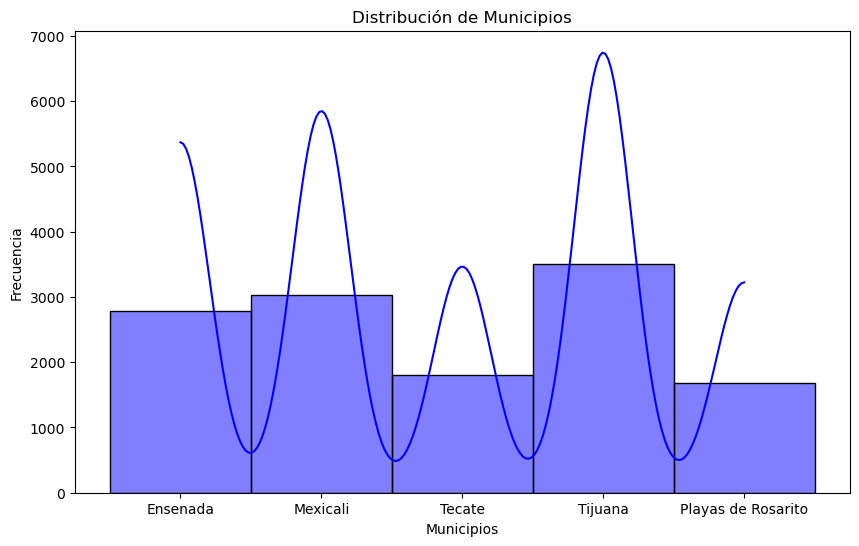

In [48]:
# Histograma de la columna 'municipio'
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['nombre_municipio'], bins=30, kde=True, color='blue')
plt.title('Distribución de Municipios')
plt.xlabel('Municipios')
plt.ylabel('Frecuencia')
plt.show()

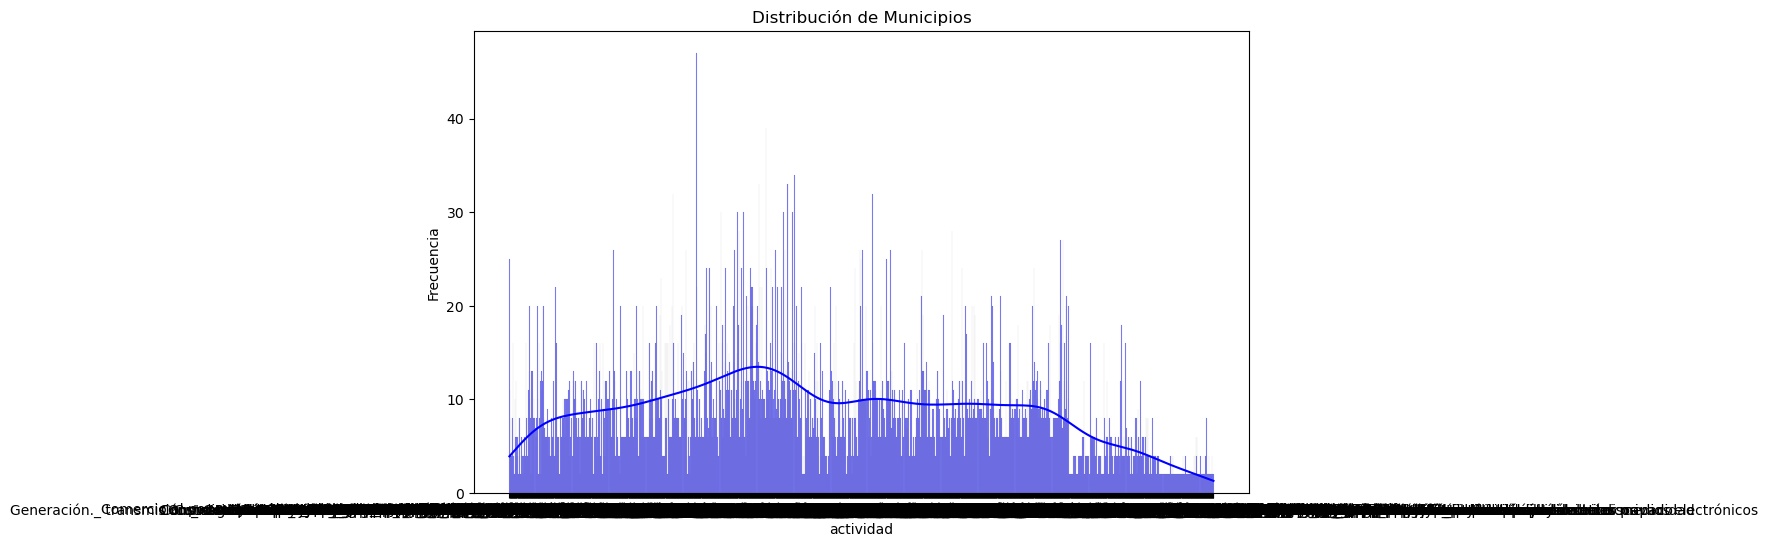

In [52]:
# Histograma de la columna 'actividad'
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['desc_codigo'], bins=30, kde=True, color='blue')
plt.title('Distribución de Municipios')
plt.xlabel('actividad')
plt.ylabel('Frecuencia')
plt.show()

A511A
A433A
A434A
A534A


In [55]:
# Lista de valores que deseas filtrar
valores = ['A511A', 'A433A', 'A434A', 'A534A']

# Filtrar el DataFrame usando 'isin'
df_filtrado = df_merged[df_merged['codigo'].isin(valores)]

# Mostrar el DataFrame filtrado
print(df_filtrado)

Empty DataFrame
Columns: [entidad, municipio, codigo, id_estrato, ue, a111a, a121a, a131a, a211a, a221a, a511a, a700a, a800a, h000a, h000b, h000c, h000d, h001a, h001b, h001c, h001d, h010a, h010b, h010c, h010d, h020a, h020b, h020c, h020d, h101a, h101b, h101c, h101d, h203a, h203b, h203c, h203d, i000a, i000b, i000c, i000d, i100a, i100b, i100c, i100d, i200a, i200b, i200c, i200d, j000a, j010a, j203a, j300a, j400a, j500a, j600a, k000a, k010a, k020a, k030a, k042a, k412a, k050a, k060a, k070a, k090a, k096a, k311a, k610a, k620a, k810a, k820a, k910a, k950a, k976a, m000a, m010a, m020a, m030a, m050a, m090a, m091a, m700a, o010a, o020a, p000a, p000b, p000c, p030a, p030b, p030c, p100a, p100b, q000a, q000b, q000c, q000d, q010a, q020a, q030a, ...]
Index: []

[0 rows x 190 columns]
